### Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
import ast

### Loading the dataset

In [3]:
# Loading csv and setting to 
user_df = pd.read_csv('../SavedData/Lloyds_users.csv')
original_df= pd.read_csv('../fake_transactional_data_24.csv')


# Changing the lists back to normal columns
user_df['user_biz_interaction'] = user_df['user_biz_interaction'].apply(ast.literal_eval)
user_df['user_biz_interaction_frequency'] = user_df['user_biz_interaction_frequency'].apply(ast.literal_eval)
user_df['user_user_interaction'] = user_df['user_user_interaction'].apply(ast.literal_eval)
user_df['user_user_interaction_frequency'] = user_df['user_user_interaction_frequency'].apply(ast.literal_eval)
user_df['user_industry_interaction'] = user_df['user_industry_interaction'].apply(ast.literal_eval)
user_df['user_industry_interaction_frequency'] = user_df['user_industry_interaction_frequency'].apply(ast.literal_eval)
user_df['user_date_transaction'] = user_df['user_date_transaction'].apply(ast.literal_eval)
user_df['user_date_transaction_freq'] = user_df['user_date_transaction_freq'].apply(ast.literal_eval)

In [4]:
user_df

,user_id,total_tx_count,net_tx_count,total_tx_sum_gbp,net_tx_sum_gbp,sent_tx_count,sent_tx_sum_gbp,sent_tx_mean_gbp,sent_tx_median_gbp,received_tx_count,...,user_biz_interaction_frequency,user_biz_spend,user_user_interaction,user_user_interaction_frequency,user_user_spend,user_industry_interaction,user_industry_interaction_frequency,user_industry_spend,user_date_transaction,user_date_transaction_freq
0,1000,1903,1517,37720.11,19676.91,1710,28698.51,16.782754,4.50,193,...,"[116, 117, 2, 72, 5, 9, 19, 1, 35, 119, 1, 2, ...","[278.15, 269.25, 217.86, 850.5, 19.5, 347.15, ...","[16354, 18013, 30208, 31489, 36647, 38289, 411...","[55, 14, 6, 12, 1, 14, 5, 14, 1, 18, 21, 1, 27...","[315.4, 86.5, 35.0, 16130.0, 5.0, 94.0, 24.0, ...","[Alcohol, Apparel, Books, Cafes, Children, Cof...","[3, 1, 1, 813, 2, 3, 37, 1, 7, 2, 30, 21, 353,...","[114.97999999999999, 145.0, 8.0, 1955.2, 160.0...","[01/01/2025, 01/02/2025, 01/03/2025, 01/04/202...","[5, 5, 13, 6, 2, 9, 5, 8, 6, 5, 5, 7, 4, 7, 2,..."
1,10000,1114,720,21360.39,18944.39,917,20152.39,21.976434,11.00,197,...,"[6, 1, 16, 71, 59, 3, 9, 7, 33, 2, 22, 7, 9, 2...","[13.65, 2.25, 349.77, 791.0, 1275.25, 12.5, 27...","[15896, 28620, 33124, 33732, 34123, 5277, 5439...","[39, 49, 1, 19, 10, 9, 59, 17, 29, 22, 19, 13]","[253.65, 5228.46, 50.0, 106.85, 55.2, 49.9, 32...","[Alcohol, Apparel, Books, Cafes, Coffee Beans ...","[1, 23, 34, 23, 1, 51, 2, 1, 14, 312, 119, 3, ...","[19.99, 3002.0, 370.0, 56.25, 33.64, 1685.48, ...","[01/02/2025, 01/03/2025, 01/04/2025, 01/06/202...","[3, 4, 1, 8, 3, 3, 2, 3, 2, 6, 3, 7, 1, 9, 7, ..."
2,100000,1919,1433,23455.27,20720.37,1676,22087.82,13.178890,4.50,243,...,"[5, 106, 129, 16, 95, 5, 11, 1, 122, 20, 1, 5,...","[113.0, 256.2, 318.4, 1596.43, 1142.5, 23.0, 4...","[12753, 24398, 24951, 28719, 34678, 39736, 489...","[19, 14, 24, 54, 17, 21, 6, 19, 9, 30, 27, 30,...","[135.5, 83.3, 146.5, 4857.0, 109.0, 124.0, 35....","[Accessories, Alcohol, Apparel, Cafes, Coffee ...","[15, 7, 1, 828, 10, 58, 5, 2, 18, 1, 334, 65, ...","[369.0, 145.95999999999998, 37.0, 2015.95, 300...","[01/01/2025, 01/02/2025, 01/03/2025, 01/04/202...","[3, 3, 10, 2, 3, 12, 5, 6, 3, 3, 3, 3, 4, 6, 1..."
3,100002,1561,1233,22393.96,20303.16,1397,21348.56,15.281718,4.50,164,...,"[50, 59, 18, 155, 1, 48, 1, 4, 26, 9, 14, 58, ...","[113.35, 142.65, 1896.42, 965.5, 10.0, 212.5, ...","[10432, 14001, 3296, 37438, 37918, 46953, 5047...","[8, 1, 5, 1, 6, 10, 11, 7, 27, 2, 2, 1, 17, 4,...","[76.08, 2.45, 35.0, 1.45, 46.0, 61.5, 52.55, 4...","[Alcohol, Apparel, Books, Cafes, Children, Cof...","[8, 32, 2, 281, 2, 3, 33, 4, 2, 10, 269, 511, ...","[166.94, 3464.0, 15.0, 767.9, 99.0, 96.81, 117...","[01/01/2025, 01/02/2025, 01/03/2025, 01/04/202...","[3, 7, 6, 2, 5, 14, 2, 14, 3, 2, 5, 4, 2, 4, 4..."
4,100019,1157,719,44632.75,16232.85,938,30432.80,32.444350,9.00,219,...,"[50, 54, 15, 91, 1, 1, 2, 11, 1, 9, 7, 68, 9, ...","[118.95, 129.0, 1163.37, 1031.0, 60.0, 3.0, 12...","[22634, 38580, 40565, 44911, 61350, 62299, 626...","[21, 33, 18, 4, 24, 11, 28, 25, 27, 58]","[125.5, 221.0, 113.0, 24.5, 163.0, 15060.0, 16...","[Alcohol, Apparel, Books, Cafes, Children, Cof...","[1, 25, 1, 214, 4, 1, 38, 1, 12, 13, 314, 1, 6...","[12.0, 2701.0, 15.0, 514.55, 250.0, 26.36, 136...","[01/02/2025, 01/03/2025, 01/06/2025, 01/07/202...","[6, 8, 3, 1, 4, 2, 2, 9, 1, 5, 3, 3, 2, 5, 3, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8137,99939,1488,1078,20117.08,17723.34,1283,18920.21,14.746851,9.00,205,...,"[56, 56, 13, 80, 57, 8, 3, 8, 2, 2, 44, 51, 23...","[136.75, 128.05, 265.17, 955.0, 1279.85, 37.0,...","[15880, 24365, 24475, 2858, 33124, 4741, 53764...","[6, 34, 17, 50, 1, 25, 31, 21, 22, 27, 13, 51,...","[31.0, 189.25, 108.0, 3905.35, 50.0, 140.65, 1...","[Alcohol, Apparel, Books, Cafes, Children, Cof...","[3, 2, 38, 227, 25, 7, 46, 3, 2, 2, 37, 25, 34...","[114.97999999999999, 263.0, 378.0, 553.85, 135...","[01/01/2025, 01/02/2025, 01/03/2025, 01/05/202...","[2, 13, 4, 2

Removing unnecessary columns: 

In [5]:
columns_to_remove = ['total_tx_count', 'net_tx_count', 'total_tx_sum_gbp', 'net_tx_sum_gbp']
user_df_updated = user_df.drop(columns=columns_to_remove)


In [6]:
user_df_updated.head()

,user_id,sent_tx_count,sent_tx_sum_gbp,sent_tx_mean_gbp,sent_tx_median_gbp,received_tx_count,received_tx_sum_gbp,received_tx_mean_gbp,received_tx_median_gbp,user_biz_interaction,user_biz_interaction_frequency,user_biz_spend,user_user_interaction,user_user_interaction_frequency,user_user_spend,user_industry_interaction,user_industry_interaction_frequency,user_industry_spend,user_date_transaction,user_date_transaction_freq
0,1000,1710,28698.51,16.782754,4.5,193,9021.60,46.744041,5.5,"[A_CAFE, A_LOCAL_COFFEE_SHOP, A_SUPERMARKET, B...","[116, 117, 2, 72, 5, 9, 19, 1, 35, 119, 1, 2, ...","[278.15, 269.25, 217.86, 850.5, 19.5, 347.15, ...","[16354, 18013, 30208, 31489, 36647, 38289, 411...","[55, 14, 6, 12, 1, 14, 5, 14, 1, 18, 21, 1, 27...","[315.4, 86.5, 35.0, 16130.0, 5.0, 94.0, 24.0, ...","[Alcohol, Apparel, Books, Cafes, Children, Cof...","[3, 1, 1, 813, 2, 3, 37, 1, 7, 2, 30, 21, 353,...","[114.97999999999999, 145.0, 8.0, 1955.2, 160.0...","[01/01/2025, 01/02/2025, 01/03/2025, 01/04/202...","[5, 5, 13, 6, 2, 9, 5, 8, 6, 5, 5, 7, 4, 7, 2,..."
1,10000,917,20152.39,21.976434,11.0,197,1208.00,6.131980,6.0,"[A_CAFE, A_LOCAL_COFFEE_SHOP, A_SUPERMARKET, B...","[6, 1, 16, 71, 59, 3, 9, 7, 33, 2, 22, 7, 9, 2...","[13.65, 2.25, 349.77, 791.0, 1275.25, 12.5, 27...","[15896, 28620, 33124, 33732, 34123, 5277, 5439...","[39, 49, 1, 19, 10, 9, 59, 17, 29, 22, 19, 13]","[253.65, 5228.46, 50.0, 106.85, 55.2, 49.9, 32...","[Alcohol, Apparel, Books, Cafes, Coffee Beans ...","[1, 23, 34, 23, 1, 51, 2, 1, 14, 312, 119, 3, ...","[19.99, 3002.0, 370.0, 56.25, 33.64, 1685.48, ...","[01/02/2025, 01/03/2025, 01/04/2025, 01/06/202...","[3, 4, 1, 8, 3, 3, 2, 3, 2, 6, 3, 7, 1, 9, 7, ..."
2,100000,1676,22087.82,13.178890,4.5,243,1367.45,5.627366,6.0,"[ACCESSORY_SHOP, A_CAFE, A_LOCAL_COFFEE_SHOP, ...","[5, 106, 129, 16, 95, 5, 11, 1, 122, 20, 1, 5,...","[113.0, 256.2, 318.4, 1596.43, 1142.5, 23.0, 4...","[12753, 24398, 24951, 28719, 34678, 39736, 489...","[19, 14, 24, 54, 17, 21, 6, 19, 9, 30, 27, 30,...","[135.5, 83.3, 146.5, 4857.0, 109.0, 124.0, 35....","[Accessories, Alcohol, Apparel, Cafes, Coffee ...","[15, 7, 1, 828, 10, 58, 5, 2, 18, 1, 334, 65, ...","[369.0, 145.95999999999998, 37.0, 2015.95, 300...","[01/01/2025, 01/02/2025, 01/03/2025, 01/04/202...","[3, 3, 10, 2, 3, 12, 5, 6, 3, 3, 3, 3, 4, 6, 1..."
3,100002,1397,21348.56,15.281718,4.5,164,1045.40,6.374390,6.0,"[A_CAFE, A_LOCAL_COFFEE_SHOP, A_SUPERMARKET, B...","[50, 59, 18, 155, 1, 48, 1, 4, 26, 9, 14, 58, ...","[113.35, 142.65, 1896.42, 965.5, 10.0, 212.5, ...","[10432, 14001, 3296, 37438, 37918, 46953, 5047...","[8, 1, 5, 1, 6, 10, 11, 7, 27, 2, 2, 1, 17, 4,...","[76.08, 2.45, 35.0, 1.45, 46.0, 61.5, 52.55, 4...","[Alcohol, Apparel, Books, Cafes, Children, Cof...","[8, 32, 2, 281, 2, 3, 33, 4, 2, 10, 269, 511, ...","[166.94, 3464.0, 15.0, 767.9, 99.0, 96.81, 117...","[01/01/2025, 01/02/2025, 01/03/2025, 01/04/202...","[3, 7, 6, 2, 5, 14, 2, 14, 3, 2, 5, 4, 2, 4, 4..."
4,100019,938,30432.80,32.444350,9.0,219,14199.95,64.839954,6.0,"[A_CAFE, A_LOCAL_COFFEE_SHOP, A_SUPERMARKET, B...","[50, 54, 15, 91, 1, 1, 2, 11, 1, 9, 7, 68, 9, ...","[118.95, 129.0, 1163.37, 1031.0, 60.0, 3.0, 12...","[22634, 38580, 40565, 44911, 61350, 62299, 626...","[21, 33, 18, 4, 24, 11, 28, 25, 27, 58]","[125.5, 221.0, 113.0, 24.5, 163.0, 15060.0, 16...","[Alcohol, Apparel, Books, Cafes, Children, Cof...","[1, 25, 1, 214, 4, 1, 38, 1, 12, 13, 314, 1, 6...","[12.0, 2701.0, 15.0, 514.55, 250.0, 26.36, 136...","[01/02/2025, 01/03/2025, 01/06/2025, 01/07/202...","[6, 8, 3, 1, 4, 2, 2, 9, 1, 5, 3, 3, 2, 5, 3, ..."


In [7]:
original_df 

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
1,88339.0,2.40,40544,01/01/2025
2,18555.0,2.40,85149,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792.0,1.95,18555,01/01/2025
...,...,...,...,...
10148275,32185.0,2.65,COFFEE_SHOP,31/12/2025
10148276,32185.0,2.45,COFFEE_SHOP,31/12/2025
10148277,57569.0,14.00,WINE_BAR,31/12/2025
10148278,1490.0,9.00,57569,31/12/2025


## Splitting the data into training and testing 

In [8]:
copied_original_df = original_df.copy()

# Splitting the copied dataset into historical_transactions (95%) and testing_transactions (5%)
historical_transactions, testing_transactions = train_test_split(copied_original_df, test_size=0.05, random_state=42)

# Displaying the shapes to verify the split
historical_transactions.shape, testing_transactions.shape


((9640866, 4), (507414, 4))

## Feature engineering for anomaly detection

### Calculating thresholds through SD

In [9]:
# Calculating mean and standard deviation for each account
stats = historical_transactions.groupby('from_totally_fake_account')['monopoly_money_amount'].agg(['mean', 'std'])

# Calculate thresholds for overall spending for user across all industries/users based on standard deviation
thresholds = stats.copy()
thresholds['Overall_Threshold_1_SD'] = stats['mean'] + 1 * stats['std']
thresholds['Overall_Threshold_2_SD'] = stats['mean'] + 2 * stats['std']
thresholds['Overall_Threshold_3_SD'] = stats['mean'] + 3 * stats['std']

# Creating a new dataframe for anomaly detection with threshold columns
anomaly_detection_df = pd.merge(user_df_updated[['user_id']], thresholds[['Overall_Threshold_1_SD', 'Overall_Threshold_2_SD', 'Overall_Threshold_3_SD']], how='left', left_on='user_id', right_index=True)

# Display the newly created anomaly_detection_df DataFrame
anomaly_detection_df.head()


,user_id,Overall_Threshold_1_SD,Overall_Threshold_2_SD,Overall_Threshold_3_SD
0,1000,131.847434,247.043256,362.239079
1,10000,72.993248,124.186244,175.379240
2,100000,48.144716,83.613285,119.081854
3,100002,53.055697,90.830014,128.604330
4,100019,189.702987,346.133242,502.563497


### Creating a user and business account df

In [10]:
historical_transactions['to_randomly_generated_account'] = historical_transactions['to_randomly_generated_account'].astype(str)

# Split the DataFrame into user accounts and business accounts without creating a new column
user_accounts_df = historical_transactions[historical_transactions['to_randomly_generated_account'].str.isdigit()]
business_accounts_df = historical_transactions[~historical_transactions['to_randomly_generated_account'].str.isdigit()]

user_accounts_df.shape, business_accounts_df.shape

((2406138, 4), (7234728, 4))

### Creating thresholds for each user to user transfers

In [11]:
def calculate_thresholds(group, num_std):
    mean = group['monopoly_money_amount'].mean()
    std = group['monopoly_money_amount'].std()
    threshold = mean + num_std * std
    return threshold

# Applying the adjusted function for each threshold calculation with different multipliers

# For Threshold 1 (1 * SD)
thresholds_1 = user_accounts_df.groupby(['from_totally_fake_account', 'to_randomly_generated_account']).apply(lambda group: calculate_thresholds(group, 1)).reset_index(name='threshold')
thresholds_structured_1 = thresholds_1.groupby('from_totally_fake_account').apply(lambda x: dict(zip(x['to_randomly_generated_account'], x['threshold']))).to_dict()

# For Threshold 2 (2 * SD)
thresholds_2 = user_accounts_df.groupby(['from_totally_fake_account', 'to_randomly_generated_account']).apply(lambda group: calculate_thresholds(group, 2)).reset_index(name='threshold')
thresholds_structured_2 = thresholds_2.groupby('from_totally_fake_account').apply(lambda x: dict(zip(x['to_randomly_generated_account'], x['threshold']))).to_dict()

# For Threshold 3 (3 * SD)
thresholds_3 = user_accounts_df.groupby(['from_totally_fake_account', 'to_randomly_generated_account']).apply(lambda group: calculate_thresholds(group, 3)).reset_index(name='threshold')
thresholds_structured_3 = thresholds_3.groupby('from_totally_fake_account').apply(lambda x: dict(zip(x['to_randomly_generated_account'], x['threshold']))).to_dict()

# Add structured mapping to anomaly_detection_df for each standard deviation threshold
anomaly_detection_df['transfer_to_accounts_threshold_1_SD'] = anomaly_detection_df['user_id'].map(thresholds_structured_1)
anomaly_detection_df['transfer_to_accounts_threshold_2_SD'] = anomaly_detection_df['user_id'].map(thresholds_structured_2)
anomaly_detection_df['transfer_to_accounts_threshold_3_SD'] = anomaly_detection_df['user_id'].map(thresholds_structured_3)

# Display the updated anomaly_detection_df to verify the new columns
anomaly_detection_df.head()



,user_id,Overall_Threshold_1_SD,Overall_Threshold_2_SD,Overall_Threshold_3_SD,transfer_to_accounts_threshold_1_SD,transfer_to_accounts_threshold_2_SD,transfer_to_accounts_threshold_3_SD
0,1000,131.847434,247.043256,362.239079,"{'16354': 7.581696354197873, '18013': 7.281140...","{'16354': 9.410562519716501, '18013': 8.383710...","{'16354': 11.23942868523513, '18013': 9.486279..."
1,10000,72.993248,124.186244,175.379240,"{'15896': 8.284332403908861, '28620': 286.5921...","{'15896': 10.132178321331235, '28620': 464.393...","{'15896': 11.980024238753609, '28620': 642.194..."
2,100000,48.144716,83.613285,119.081854,"{'12753': 8.757079117795582, '24398': 7.836388...","{'12753': 10.347491568924497, '24398': 9.72277...","{'12753': 11.937904020053411, '24398': 11.6091..."
3,100002,53.055697,90.830014,128.604330,"{'10432': 18.93781295650572, '14001': nan, '32...","{'10432': 28.365625913011442, '14001': nan, '3...","{'10432': 37.79343886951716, '14001': nan, '32..."
4,100019,189.702987,346.133242,502.563497,"{'22634': 6.9311275222331785, '38580': 8.48205...","{'22634': 7.886064568275881, '38580': 10.21410...","{'22634': 8.841001614318584, '38580': 11.94615..."


### Creating thresholds for each user to industry transactions

In [16]:
industry_categories = {
    "ELECTRONICS_SHOP": "Electronics / Technology",
    "TECH_SHOP": "Electronics / Technology",
    "HIPSTER_ELECTRONICS_SHOP": "Electronics / Technology",
    "CHINESE_RESTAURANT": "Dining",
    "TAKEAWAY": "Dining",
    "SEAFOOD_RESAURANT": "Dining",
    "CHINESE_TAKEAWAY": "Dining",
    "TAKEAWAY_CURRY": "Dining",
    "STEAK_HOUSE": "Dining",
    "RESTAURANT": "Dining",
    "LOCAL_PUB": "Dining",
    "INDIAN_RESTAURANT": "Dining",
    "A_SUPERMARKET": "Supermarkets",
    "EXPRESS_SUPERMARKET": "Supermarkets",
    "THE_SUPERMARKET": "Supermarkets",
    "LARGE_SUPERMARKET": "Supermarkets",
    "CLOTHES_SHOP": "Apparel",
    "DEPARTMENT_STORE": "Apparel",
    "FASHION_SHOP": "Apparel",
    "FASHIONABLE_SPORTSWARE_SHOP": "Sports",
    "TRAINER_SHOP": "Sports",
    "SPORT_SHOP": "Sports",
    "RUNNING_SHOP": "Sports",
    "VIDEO_GAME_STORE": "Gaming",
    "GAME_SHOP": "Gaming",
    "TOY_SHOP": "Children",
    "KIDS_CLOTHING_SHOP": "Children",
    "KIDS_ACTIVITY_CENTRE": "Children",
    "CHILDRENDS_SHOP": "Children",
    "SCHOOL_SUPPLY_STORE": "Children",
    "HOME_IMPROVEMENT_STORE": "Hardware",
    "DIY_STORE": "Hardware",
    "PET_TOY_SHOP": "Pets",
    "PET_SHOP": "Pets",
    "WE_HAVE_BEAN_WEIGHTING": "Coffee Beans and Teas",
    "TO_BEAN_OR_NOT_TO_BEAN": "Coffee Beans and Teas",
    "TEA_SHOP": "Coffee Beans and Teas",
    "ROASTERIE": "Coffee Beans and Teas",
    "RESTAURANT_VOUCHER": "Gifts",
    "FLORIST": "Gifts",
    "BUTCHER": "Specialty Foods",
    "GREENGROCER": "Specialty Foods",
    "BUTCHERS": "Specialty Foods",
    "TURKEY_FARM": "Specialty Foods",
    "COOKSHOP": "Specialty Foods",
    "JEWLLERY_SHOP": "Accessories",
    "ACCESSORY_SHOP": "Accessories",
    "GYM": "Health and fitness",
    "LIQUOR_STORE": "Alcohol",
    "WHISKEY_SHOP": "Alcohol",
    "WINE_CELLAR": "Alcohol",
    "LOCAL_BOOKSHOP": "Books",
    "BOOKSHOP": "Books",
    "SECOND_HAND_BOOKSHOP": "Books",
    "COMIC_BOOK_SHOP": "Books",
    "NERDY_BOOK_STORE": "Books",
    "WINE_BAR": "Pubs / Bars",
    "WHISKEY_BAR": "Pubs / Bars",
    "PUB": "Pubs / Bars",
    "G&T_BAR": "Pubs / Bars",
    "COCKTAIL_BAR": "Pubs / Bars",
    "LOCAL_WATERING_HOLE": "Pubs / Bars",
    "BAR": "Pubs / Bars",
    "STREAMING_SERVICE": "TV/Film",
    "DVD_SHOP": "TV/Film",
    "CINEMA": "TV/Film",
    "LOCAL_RESTAURANT": "Lunch / Light Meal",
    "SANDWICH_SHOP": "Lunch / Light Meal",
    "LUNCH_VAN": "Lunch / Light Meal",
    "LUNCH_PLACE": "Lunch / Light Meal",
    "KEBAB_SHOP": "Lunch / Light Meal",
    "CAFE": "Lunch / Light Meal",
    "A_CAFE": "Cafes",
    "A_LOCAL_COFFEE_SHOP": "Cafes",
    "CAFÉ": "Cafes",
    "COFFEE_SHOP": "Cafes",
    "GOURMET_COFFEE_SHOP": "Cafes",
    "TOTALLY_A_REAL_COFFEE_SHOP": "Cafes",
    "PRETENTIOUS_COFFEE_SHOP": "Cafes",
    "HIPSTER_COFFEE_SHOP": "Cafes"
}

In [13]:
# Add industry column to tx_df
def tx_df_industry_mapping(key):
    if key in industry_categories:
        return industry_categories[key]
    else:  # All values not in industry_categories are set to user
        return 'User'
    

# Apply the mapping
business_accounts_df['industry_category'] = business_accounts_df['to_randomly_generated_account'].apply(tx_df_industry_mapping)
business_accounts_df

/var/folders/rw/215myrns4md_n1k8nkyww6mw0000gn/T/ipykernel_47924/440029363.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_accounts_df['industry_category'] = business_accounts_df['to_randomly_generated_account'].apply(tx_df_industry_mapping)


,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,industry_category
167950,27399.0,2.25,PRETENTIOUS_COFFEE_SHOP,06/01/2025,Cafes
6125161,17225.0,18.00,LOCAL_WATERING_HOLE,09/08/2025,Pubs / Bars
260798,94487.0,29.03,BUTCHER,10/01/2025,Specialty Foods
1206740,32382.0,12.00,PUB,14/02/2025,Pubs / Bars
4005231,75379.0,11.50,G&T_BAR,25/05/2025,Pubs / Bars
...,...,...,...,...,...
9958614,37225.0,5.50,PUB,25/12/2025,Pubs / Bars
4304572,32692.0,73.91,LARGE_SUPERMARKET,05/06/2025,Supermarkets
10081351,81404.0,13.00,WINE_BAR,28/12/2025,Pubs / Bars
6550634,7300.0,2.40,COFFEE_SHOP,26/08/2025,Cafes


In [14]:
# Re-define the calculate_thresholds function to use standard deviations
def calculate_thresholds(group, num_std):
    mean = group['monopoly_money_amount'].mean()
    std = group['monopoly_money_amount'].std()
    threshold = mean + num_std * std
    return threshold

# Assuming business_accounts_df is already defined
# Group the data by 'from_totally_fake_account' and 'industry_category'
grouped_by_industry = business_accounts_df.groupby(['from_totally_fake_account', 'industry_category'])

# Calculate thresholds for each grouping
thresholds_structured_by_industry_and_category = {}
for (acc, cat), group in grouped_by_industry:
    thresholds_structured_by_industry_and_category[(acc, cat)] = {
        'threshold_1_SD': calculate_thresholds(group, 1),
        'threshold_2_SD': calculate_thresholds(group, 2),
        'threshold_3_SD': calculate_thresholds(group, 3)
    }


# Create a mapping function that retrieves threshold values for a given user and industry
def map_thresholds_to_user(user_id, threshold_key):
    return {cat: details[threshold_key] for (acc, cat), details in thresholds_structured_by_industry_and_category.items() if acc == user_id}

# Apply the mapping function for each standard deviation level
anomaly_detection_df['industry_threshold_1_SD'] = anomaly_detection_df['user_id'].apply(lambda x: map_thresholds_to_user(x, 'threshold_1_SD'))
anomaly_detection_df['industry_threshold_2_SD'] = anomaly_detection_df['user_id'].apply(lambda x: map_thresholds_to_user(x, 'threshold_2_SD'))
anomaly_detection_df['industry_threshold_3_SD'] = anomaly_detection_df['user_id'].apply(lambda x: map_thresholds_to_user(x, 'threshold_3_SD'))

# Display the updated anomaly_detection_df to verify the new columns
anomaly_detection_df.head()


,user_id,Overall_Threshold_1_SD,Overall_Threshold_2_SD,Overall_Threshold_3_SD,transfer_to_accounts_threshold_1_SD,transfer_to_accounts_threshold_2_SD,transfer_to_accounts_threshold_3_SD,industry_threshold_1_SD,industry_threshold_2_SD,industry_threshold_3_SD
0,1000,131.847434,247.043256,362.239079,"{'16354': 7.581696354197873, '18013': 7.281140...","{'16354': 9.410562519716501, '18013': 8.383710...","{'16354': 11.23942868523513, '18013': 9.486279...","{'Alcohol': 71.6140521652806, 'Apparel': nan, ...","{'Alcohol': 104.90143766389454, 'Apparel': nan...","{'Alcohol': 138.18882316250847, 'Apparel': nan..."
1,10000,72.993248,124.186244,175.379240,"{'15896': 8.284332403908861, '28620': 286.5921...","{'15896': 10.132178321331235, '28620': 464.393...","{'15896': 11.980024238753609, '28620': 642.194...","{'Alcohol': nan, 'Apparel': 178.2114335771946,...","{'Alcohol': nan, 'Apparel': 226.37286715438918...","{'Alcohol': nan, 'Apparel': 274.53430073158376..."
2,100000,48.144716,83.613285,119.081854,"{'12753': 8.757079117795582, '24398': 7.836388...","{'12753': 10.347491568924497, '24398': 9.72277...","{'12753': 11.937904020053411, '24398': 11.6091...","{'Accessories': 34.950487944707426, 'Alcohol':...","{'Accessories': 45.25811874655771, 'Alcohol': ...","{'Accessories': 55.56574954840799, 'Alcohol': ..."
3,100002,53.055697,90.830014,128.604330,"{'10432': 18.93781295650572, '14001': nan, '32...","{'10432': 28.365625913011442, '14001': nan, '3...","{'10432': 37.79343886951716, '14001': nan, '32...","{'Alcohol': 35.537294769233434, 'Apparel': 160...","{'Alcohol': 50.20708953846686, 'Apparel': 212....","{'Alcohol': 64.8768843077003, 'Apparel': 263.5..."
4,100019,189.702987,346.133242,502.563497,"{'22634': 6.9311275222331785, '38580': 8.48205...","{'22634': 7.886064568275881, '38580': 10.21410...","{'22634': 8.841001614318584, '38580': 11.94615...","{'Alcohol': nan, 'Apparel': 159.10093377623835...","{'Alcohol': nan, 'Apparel': 208.61853421914338...","{'Alcohol': nan, 'Apparel': 258.1361346620484,..."


### Adding the use-user interactions and user-industry interactions

In [17]:
# Extracting keys from 'transfer_to_accounts_threshold_1_IQR' to create 'user_user_interaction'
anomaly_detection_df['user_user_interaction'] = anomaly_detection_df['transfer_to_accounts_threshold_1_SD'].apply(lambda x: list(x.keys()))

# Extracting keys from 'industry_threshold_1_IQR' to create 'user_industry_interaction'
anomaly_detection_df['user_industry_interaction'] = anomaly_detection_df['industry_threshold_1_SD'].apply(lambda x: list(x.keys()))

anomaly_detection_df


,user_id,Overall_Threshold_1_SD,Overall_Threshold_2_SD,Overall_Threshold_3_SD,transfer_to_accounts_threshold_1_SD,transfer_to_accounts_threshold_2_SD,transfer_to_accounts_threshold_3_SD,industry_threshold_1_SD,industry_threshold_2_SD,industry_threshold_3_SD,user_user_interaction,user_industry_interaction
0,1000,131.847434,247.043256,362.239079,"{'16354': 7.581696354197873, '18013': 7.281140...","{'16354': 9.410562519716501, '18013': 8.383710...","{'16354': 11.23942868523513, '18013': 9.486279...","{'Alcohol': 71.6140521652806, 'Apparel': nan, ...","{'Alcohol': 104.90143766389454, 'Apparel': nan...","{'Alcohol': 138.18882316250847, 'Apparel': nan...","[16354, 18013, 30208, 31489, 38289, 41117, 417...","[Alcohol, Apparel, Books, Cafes, Children, Cof..."
1,10000,72.993248,124.186244,175.379240,"{'15896': 8.284332403908861, '28620': 286.5921...","{'15896': 10.132178321331235, '28620': 464.393...","{'15896': 11.980024238753609, '28620': 642.194...","{'Alcohol': nan, 'Apparel': 178.2114335771946,...","{'Alcohol': nan, 'Apparel': 226.37286715438918...","{'Alcohol': nan, 'Apparel': 274.53430073158376...","[15896, 28620, 33124, 33732, 34123, 5277, 5439...","[Alcohol, Apparel, Books, Cafes, Coffee Beans ..."
2,100000,48.144716,83.613285,119.081854,"{'12753': 8.757079117795582, '24398': 7.836388...","{'12753': 10.347491568924497, '24398': 9.72277...","{'12753': 11.937904020053411, '24398': 11.6091...","{'Accessories': 34.950487944707426, 'Alcohol':...","{'Accessories': 45.25811874655771, 'Alcohol': ...","{'Accessories': 55.56574954840799, 'Alcohol': ...","[12753, 24398, 24951, 28719, 34678, 39736, 489...","[Accessories, Alcohol, Apparel, Cafes, Coffee ..."
3,100002,53.055697,90.830014,128.604330,"{'10432': 18.93781295650572, '14001': nan, '32...","{'10432': 28.365625913011442, '14001': nan, '3...","{'10432': 37.79343886951716, '14001': nan, '32...","{'Alcohol': 35.537294769233434, 'Apparel': 160...","{'Alcohol': 50.20708953846686, 'Apparel': 212....","{'Alcohol': 64.8768843077003, 'Apparel': 263.5...","[10432, 14001, 3296, 37438, 37918, 46953, 5047...","[Alcohol, Apparel, Books, Cafes, Children, Cof..."
4,100019,189.702987,346.133242,502.563497,"{'22634': 6.9311275222331785, '38580': 8.48205...","{'22634': 7.886064568275881, '38580': 10.21410...","{'22634': 8.841001614318584, '38580': 11.94615...","{'Alcohol': nan, 'Apparel': 159.10093377623835...","{'Alcohol': nan, 'Apparel': 208.61853421914338...","{'Alcohol': nan, 'Apparel': 258.1361346620484,...","[22634, 38580, 40565, 44911, 61350, 62299, 626...","[Alcohol, Apparel, Cafes, Children, Coffee Bea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8137,99939,45.598999,76.525690,107.452381,"{'15880': 5.84979671773064, '24365': 7.4603609...","{'15880': 6.5329267687946135, '24365': 9.13905...","{'15880': 7.216056819858586, '24365': 10.81774...","{'Alcohol': 71.61405216528058, 'Apparel': 149....","{'Alcohol': 104.90143766389451, 'Apparel': 166...","{'Alcohol': 138.18882316250844, 'Apparel': 184...","[15880, 24365, 24475, 2858, 33124, 4741, 53764...","[Alcohol, Apparel, Books, Cafes, Children, Cof..."
8138,99949,49.897070,86.052953,122.208837,"{'1697': 6.239923597751716, '32368': 8.1281418...","{'1697': 8.09984719550343, '32368': 10.4037837...","{'1697': 9.959770793255146, '32368': 12.679425...","{'Alcohol': 43.13818108781497, 'Apparel': 147....","{'Alcohol': 59.533862175629935, 'Apparel': 172...","{'Alcohol': 75.92954326344491, 'Apparel': 197....","[1697, 32368, 33124, 39937, 52658, 53534, 6314...","[Alcohol, Apparel, Books, Cafes, Children, Cof..."
8139,99952,160.499771,294.508064,428.516356,"{'16004': 5.408248290463863, '23861': 1765.743...","{'16004': 5.816496580927726, '23861': 2180.122...","{'16004': 6.224744871391589, '23861': 2594.502...","{'Alcohol': 52.76798438054235, 'Books': 16.959...","{'Alcohol': 80.9379687610847, 'Books': 22.3604...","{'Alcohol': 109.10795314162705, 'Books': 27.76...","[16004, 23861, 25637, 30279, 44652, 51998, 555...","[Alcohol, Books, Cafes, Children, C

In [17]:
# # Filter for the specific user_id
# specific_user_row = anomaly_detection_df[anomaly_detection_df['user_id'] == 25711.0]
# # Access the industry_threshold_3_IQR value for the specific user
# if not specific_user_row.empty:
#     industry_threshold_3_IQR_value = specific_user_row['industry_threshold_2_IQR'].iloc[0]
#     print(f"Industry Threshold 3 IQR for user 1000: {industry_threshold_3_IQR_value}")
# else:
#     print("User 1000 not found.")

## Risk flagging function- per user transaction

In [44]:
# Define the functions
def get_threshold_value(user_data, key, industry=None):
    value = user_data.get(key, 0)
    if isinstance(value, dict):
        return value.get(industry, float('inf'))
    return value

def assess_transaction_risk(from_account, amount, to_account, transaction_date, industry_categories, anomaly_detection_df):
    is_business_account = not str(to_account).isdigit()
    business_industry = industry_categories.get(to_account) if is_business_account else None
    user_data = anomaly_detection_df.loc[anomaly_detection_df['user_id'] == from_account].iloc[0].to_dict()
    risk_level = "No Risk"
    if is_business_account:
        is_new_industry = business_industry not in user_data['user_industry_interaction'] if business_industry else True
        if is_new_industry:
            thresholds = [user_data['Overall_Threshold_1_IQR'], user_data['Overall_Threshold_2_IQR'], user_data['Overall_Threshold_3_IQR']]
        else:
            thresholds = [
                get_threshold_value(user_data, 'industry_threshold_1_IQR', business_industry),
                get_threshold_value(user_data, 'industry_threshold_2_IQR', business_industry),
                get_threshold_value(user_data, 'industry_threshold_3_IQR', business_industry)
            ]
    else:
        is_new_user = to_account not in user_data['user_user_interaction']
        if is_new_user:
            thresholds = [user_data['Overall_Threshold_1_IQR'], user_data['Overall_Threshold_2_IQR'], user_data['Overall_Threshold_3_IQR']]
        else:
            thresholds = [
                get_threshold_value(user_data, 'transfer_to_accounts_threshold_1_IQR', str(to_account)),
                get_threshold_value(user_data, 'transfer_to_accounts_threshold_2_IQR', str(to_account)),
                get_threshold_value(user_data, 'transfer_to_accounts_threshold_3_IQR', str(to_account))
            ]
    if amount > thresholds[2]:
        risk_level = "High Risk"
    elif amount > thresholds[1]:
        risk_level = "Medium Risk"
    elif amount > thresholds[0]:
        risk_level = "Low Risk"
    return risk_level


# Rename columns to match function parameters for simplicity
testing_transactions.columns = ['from_totally_fake_account', 'monopoly_money_amount', 'to_randomly_generated_account', 'not_happened_yet_date']


# Assess risk level for each transaction
risk_levels = [assess_transaction_risk(row['from_totally_fake_account'], row['monopoly_money_amount'], row['to_randomly_generated_account'], row['not_happened_yet_date'], 
                                        industry_categories, anomaly_detection_df) for index, row in testing_transactions.iterrows()]

# Add risk levels as a new column
testing_transactions['risk_level'] = risk_levels

# Display the updated DataFrame
testing_transactions.head()


ValueError: Length mismatch: Expected axis has 7 elements, new values have 4 elements

In [42]:
# Filter the DataFrame for rows where risk_level is 'High Risk'
testing_transactions[testing_transactions['risk_level'] == 'Low Risk']


,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,risk_level,week_number,month/year
2283972,67244.0,3.70,GOURMET_COFFEE_SHOP,2025-03-23,Low Risk,12,03/2025
10044982,92226.0,60.00,LOCAL_RESTAURANT,2025-12-27,Low Risk,52,12/2025
4763092,88821.0,25.31,PUB,2025-06-21,Low Risk,25,06/2025
8447646,8267.0,4.00,A_CAFE,2025-11-02,Low Risk,44,11/2025
5555159,9916.0,9.00,1210,2025-07-19,Low Risk,29,07/2025
...,...,...,...,...,...,...,...
4658143,73788.0,4.55,A_CAFE,2025-06-17,Low Risk,24,06/2025
1901633,89061.0,9.00,67652,2025-03-09,Low Risk,10,03/2025
7075893,49927.0,4.10,TOTALLY_A_REAL_COFFEE_SHOP,2025-09-14,Low Risk,37,09/2025
7142951,78576.0,4.15,A_CAFE,2025-09-17,Low Risk,38,09/2025


In [20]:
testing_transactions[testing_transactions['risk_level'] == 'No Risk']

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,risk_level
7226340,23311.0,17.14,TAKEAWAY_CURRY,20/09/2025,No Risk
7969670,90357.0,30.41,RESTAURANT,17/10/2025,No Risk
3223600,78652.0,10.00,TAKEAWAY_CURRY,26/04/2025,No Risk
4601217,100986.0,11.50,COCKTAIL_BAR,15/06/2025,No Risk
9383383,7979.0,11.00,BAR,06/12/2025,No Risk
...,...,...,...,...,...
2100582,22016.0,2.40,A_CAFE,17/03/2025,No Risk
4092575,79141.0,2.65,A_CAFE,28/05/2025,No Risk
7483606,40207.0,4.50,66891,28/09/2025,No Risk
4805924,41952.0,14.25,EXPRESS_SUPERMARKET,22/06/2025,No Risk


After this transaction, if it was categorised as no risk, or after confirmation from the user account that it was legitimate, you could update the user's information (thresholds, and users/industries interacted with). 

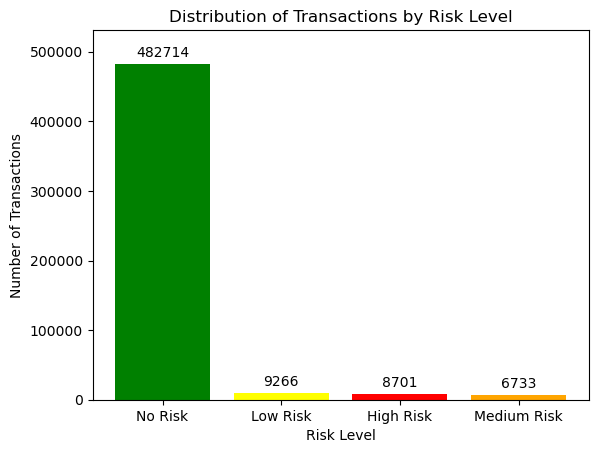

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming testing_transactions is a pandas DataFrame and 'risk_level' is a column in it
# First, calculate the value counts for the 'risk_level' column
risk_level_counts = testing_transactions['risk_level'].value_counts()

# Now we have the correct counts per risk level, let's plot
fig, ax = plt.subplots()

# Create a bar chart
bars = ax.bar(risk_level_counts.index, risk_level_counts.values, color=['green', 'yellow', 'red', 'orange'])

# Title and labels
plt.title('Distribution of Transactions by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Number of Transactions')

# Set y-axis large enough to fit labels above bars
ax.set_ylim(0, max(risk_level_counts.values) * 1.1)

# Adding the text labels on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.show()



## Risk Flagging function- per frequency of transactions

### Feature engineering for the frequency model

In [21]:
anomaly_detection_df

,user_id,Overall_Threshold_1_IQR,Overall_Threshold_2_IQR,Overall_Threshold_3_IQR,median_trans_per_day,median_trans_per_week,median_trans_per_month,transfer_to_accounts_threshold_1_IQR,transfer_to_accounts_threshold_2_IQR,transfer_to_accounts_threshold_3_IQR,industry_threshold_1_IQR,industry_threshold_2_IQR,industry_threshold_3_IQR,user_user_interaction,user_industry_interaction
0,1000,20.15000,45.0000,80.5000,4.0,31.0,132.0,"{'16354': 8.5, '18013': 8.5, '30208': 7.5, '31...","{'16354': 10.5, '18013': 10.5, '30208': 8.5, '...","{'16354': 12.5, '18013': 12.5, '30208': 9.5, '...","{'Alcohol': 117.47999999999999, 'Apparel': 145...","{'Alcohol': 182.46999999999997, 'Apparel': 145...","{'Alcohol': 247.45999999999998, 'Apparel': 145...","[16354, 18013, 30208, 31489, 38289, 41117, 417...","[Alcohol, Apparel, Books, Cafes, Children, Cof..."
1,10000,32.63125,69.9150,123.1775,2.0,16.0,71.0,"{'15896': 16.0, '28620': 410.74749999999995, '...","{'15896': 23.0, '28620': 680.6624999999999, '3...","{'15896': 30.0, '28620': 950.5774999999999, '3...","{'Alcohol': 19.99, 'Apparel': 367.0, 'Books': ...","{'Alcohol': 19.99, 'Apparel': 555.0, 'Books': ...","{'Alcohol': 19.99, 'Apparel': 743.0, 'Books': ...","[15896, 28620, 33124, 33732, 34123, 5277, 5439...","[Alcohol, Apparel, Books, Cafes, Coffee Beans ..."
2,100000,23.27500,52.5000,94.2500,4.0,30.0,131.0,"{'12753': 14.75, '24398': 8.25, '24951': 10.5,...","{'12753': 20.5, '24398': 10.0, '24951': 14.5, ...","{'12753': 26.25, '24398': 11.75, '24951': 18.5...","{'Accessories': 58.75, 'Alcohol': 29.994999999...","{'Accessories': 85.25, 'Alcohol': 43.994999999...","{'Accessories': 111.75, 'Alcohol': 57.99499999...","[12753, 24398, 24951, 28719, 34678, 39736, 489...","[Accessories, Alcohol, Apparel, Cafes, Coffee ..."
3,100002,22.07500,50.2500,90.5000,3.0,25.0,107.5,"{'10432': 10.125, '14001': 2.45, '3296': 15.5,...","{'10432': 13.125, '14001': 2.45, '3296': 22.0,...","{'10432': 16.125, '14001': 2.45, '3296': 28.5,...","{'Alcohol': 60.724999999999994, 'Apparel': 310...","{'Alcohol': 95.21, 'Apparel': 475.0, 'Books': ...","{'Alcohol': 129.695, 'Apparel': 640.0, 'Books'...","[10432, 14001, 3296, 37438, 37918, 46953, 5047...","[Alcohol, Apparel, Books, Cafes, Children, Cof..."
4,100019,25.75000,55.5000,98.0000,2.0,16.0,75.0,"{'22634': 8.5, '38580': 16.0, '40565': 8.5, '4...","{'22634': 10.5, '38580': 23.0, '40565': 10.5, ...","{'22634': 12.5, '38580': 30.0, '40565': 12.5, ...","{'Alcohol': 12.0, 'Apparel': 292.25, 'Cafes': ...","{'Alcohol': 12.0, 'Apparel': 438.75, 'Cafes': ...","{'Alcohol': 12.0, 'Apparel': 585.25, 'Cafes': ...","[22634, 38580, 40565, 44911, 61350, 62299, 626...","[Alcohol, Apparel, Cafes, Children, Coffee Bea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8137,99939,26.71875,57.2475,100.8600,3.0,22.0,100.5,"{'15880': 8.0, '24365': 9.0, '24475': 8.0, '28...","{'15880': 10.25, '24365': 12.0, '24475': 9.5, ...","{'15880': 12.5, '24365': 15.0, '24475': 11.0, ...","{'Alcohol': 117.47999999999999, 'Apparel': 162...","{'Alcohol': 182.46999999999997, 'Apparel': 187...","{'Alcohol': 247.45999999999998, 'Apparel': 212...","[15880, 24365, 24475, 2858, 33124, 4741, 53764...","[Alcohol, Apparel, Books, Cafes, Children, Cof..."
8138,99949,19.50000,40.5000,70.5000,2.0,18.0,79.0,"{'1697': 9.75, '32368': 10.25, '33124': 50.0, ...","{'1697': 14.5, '32368': 13.75, '33124': 50.0, ...","{'1697': 19.25, '32368': 17.25, '33124': 50.0,...","{'Alcohol': 57.735, 'Apparel': 185.0, 'Books':...","{'Alcohol': 84.22999999999999, 'Apparel': 235....","{'Alcohol': 110.72499999999998, 'Apparel': 285...","[1697, 32368, 33124, 39937, 52658, 53534, 6314...","[Alcohol, Apparel, Books, Cafes, Children, Cof..."
8139,99952,22.50000,47.0000,82.0000,3.0,22.5,102.0,"{'16004': 5.625, '23861': 3267.5, '25637': 6.5...","{'16004': 6.125, '23861': 4782.5, '25637': 7.5...","{'16004': 6.625, '23861': 6297.5, '25637': 8.5...","{'Alcohol': 12.0, 'Books': 35.0, 'Cafes': 3.34...","{'Alcohol': 12.0, 'Books': 55.0, 'Cafes'

In [22]:
# Convert dates from string to datetime
historical_transactions['not_happened_yet_date'] = pd.to_datetime(historical_transactions['not_happened_yet_date'], format='%d/%m/%Y')

# Set up aggregation by day, week, and month for each user
historical_transactions['day'] = historical_transactions['not_happened_yet_date'].dt.date
historical_transactions['week'] = historical_transactions['not_happened_yet_date'].dt.isocalendar().week
historical_transactions['month'] = historical_transactions['not_happened_yet_date'].dt.month
historical_transactions['year'] = historical_transactions['not_happened_yet_date'].dt.year

# Aggregate transactions
daily_transactions = historical_transactions.groupby(['from_totally_fake_account', 'day']).size().reset_index(name='daily_transactions')
weekly_transactions = historical_transactions.groupby(['from_totally_fake_account', 'year', 'week']).size().reset_index(name='weekly_transactions')
monthly_transactions = historical_transactions.groupby(['from_totally_fake_account', 'year', 'month']).size().reset_index(name='monthly_transactions')

daily_transactions.head(), weekly_transactions.head(), monthly_transactions.head()


(   from_totally_fake_account         day  daily_transactions
 0                     1000.0  2025-01-01                   4
 1                     1000.0  2025-01-02                   4
 2                     1000.0  2025-01-03                   9
 3                     1000.0  2025-01-04                   9
 4                     1000.0  2025-01-05                  12,
    from_totally_fake_account  year  week  weekly_transactions
 0                     1000.0  2025     1                   48
 1                     1000.0  2025     2                   21
 2                     1000.0  2025     3                   37
 3                     1000.0  2025     4                   30
 4                     1000.0  2025     5                   24,
    from_totally_fake_account  year  month  monthly_transactions
 0                     1000.0  2025      1                   138
 1                     1000.0  2025      2                   148
 2                     1000.0  2025      3           

In [23]:
def calculate_thresholds(transactions):
    # Calculate Q1, Q3, and IQR
    q1 = transactions.quantile(0.25)
    q3 = transactions.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate thresholds
    threshold1 = q3 + 1* iqr
    threshold2 = q3 + 1.5* iqr
    threshold3 = q3 + 2* iqr
    
    return threshold1, threshold2, threshold3

# Group by user and calculate thresholds for daily, weekly, and monthly transactions
daily_thresholds = daily_transactions.groupby('from_totally_fake_account')['daily_transactions'].apply(calculate_thresholds).reset_index(name='thresholds')
weekly_thresholds = weekly_transactions.groupby('from_totally_fake_account')['weekly_transactions'].apply(calculate_thresholds).reset_index(name='thresholds')
monthly_thresholds = monthly_transactions.groupby('from_totally_fake_account')['monthly_transactions'].apply(calculate_thresholds).reset_index(name='thresholds')

# Split the tuples into separate columns
daily_thresholds[['daily_threshold1', 'daily_threshold2', 'daily_threshold3']] = pd.DataFrame(daily_thresholds['thresholds'].tolist(), index=daily_thresholds.index)
weekly_thresholds[['weekly_threshold1', 'weekly_threshold2', 'weekly_threshold3']] = pd.DataFrame(weekly_thresholds['thresholds'].tolist(), index=weekly_thresholds.index)
monthly_thresholds[['monthly_threshold1', 'monthly_threshold2', 'monthly_threshold3']] = pd.DataFrame(monthly_thresholds['thresholds'].tolist(), index=monthly_thresholds.index)

# Drop the original 'thresholds' column
daily_thresholds.drop(columns='thresholds', inplace=True)
weekly_thresholds.drop(columns='thresholds', inplace=True)
monthly_thresholds.drop(columns='thresholds', inplace=True)

daily_thresholds.head(), weekly_thresholds.head(), monthly_thresholds.head()


(   from_totally_fake_account  daily_threshold1  daily_threshold2  \
 0                     1000.0               7.0               8.0   
 1                     1002.0               6.0               7.0   
 2                     1006.0               9.0              10.5   
 3                     1018.0               7.0               8.5   
 4                     1053.0               6.0               7.0   
 
    daily_threshold3  
 0               9.0  
 1               8.0  
 2              12.0  
 3              10.0  
 4               8.0  ,
    from_totally_fake_account  weekly_threshold1  weekly_threshold2  \
 0                     1000.0              49.00             55.000   
 1                     1002.0              29.25             32.875   
 2                     1006.0              44.00             47.500   
 3                     1018.0              22.00             24.500   
 4                     1053.0              34.25             37.375   
 
    weekly_thresh

In [24]:
# Merge daily thresholds
anomaly_detection_df = anomaly_detection_df.merge(daily_thresholds, left_on='user_id', right_on='from_totally_fake_account', how='left').drop(columns=['from_totally_fake_account'])

# Merge weekly thresholds
anomaly_detection_df = anomaly_detection_df.merge(weekly_thresholds, left_on='user_id', right_on='from_totally_fake_account', how='left').drop(columns=['from_totally_fake_account'])

# Merge monthly thresholds
anomaly_detection_df = anomaly_detection_df.merge(monthly_thresholds, left_on='user_id', right_on='from_totally_fake_account', how='left').drop(columns=['from_totally_fake_account'])


In [25]:
anomaly_detection_df.head()

,user_id,Overall_Threshold_1_IQR,Overall_Threshold_2_IQR,Overall_Threshold_3_IQR,median_trans_per_day,median_trans_per_week,median_trans_per_month,transfer_to_accounts_threshold_1_IQR,transfer_to_accounts_threshold_2_IQR,transfer_to_accounts_threshold_3_IQR,...,user_industry_interaction,daily_threshold1,daily_threshold2,daily_threshold3,weekly_threshold1,weekly_threshold2,weekly_threshold3,monthly_threshold1,monthly_threshold2,monthly_threshold3
0,1000,20.15000,45.000,80.5000,4.0,31.0,132.0,"{'16354': 8.5, '18013': 8.5, '30208': 7.5, '31...","{'16354': 10.5, '18013': 10.5, '30208': 8.5, '...","{'16354': 12.5, '18013': 12.5, '30208': 9.5, '...",...,"[Alcohol, Apparel, Books, Cafes, Children, Cof...",7.0,8.0,9.0,49.0,55.000,61.00,151.00,156.250,161.50
1,10000,32.63125,69.915,123.1775,2.0,16.0,71.0,"{'15896': 16.0, '28620': 410.74749999999995, '...","{'15896': 23.0, '28620': 680.6624999999999, '3...","{'15896': 30.0, '28620': 950.5774999999999, '3...",...,"[Alcohol, Apparel, Books, Cafes, Coffee Beans ...",9.0,11.0,13.0,26.0,29.500,33.00,100.00,108.500,117.00
2,100000,23.27500,52.500,94.2500,4.0,30.0,131.0,"{'12753': 14.75, '24398': 8.25, '24951': 10.5,...","{'12753': 20.5, '24398': 10.0, '24951': 14.5, ...","{'12753': 26.25, '24398': 11.75, '24951': 18.5...",...,"[Accessories, Alcohol, Apparel, Cafes, Coffee ...",7.0,8.0,9.0,44.0,48.500,53.00,154.50,161.625,168.75
3,100002,22.07500,50.250,90.5000,3.0,25.0,107.5,"{'10432': 10.125, '14001': 2.45, '3296': 15.5,...","{'10432': 13.125, '14001': 2.45, '3296': 22.0,...","{'10432': 16.125, '14001': 2.45, '3296': 28.5,...",...,"[Alcohol, Apparel, Books, Cafes, Children, Cof...",8.0,9.5,11.0,40.0,44.750,49.50,142.25,152.625,163.00
4,100019,25.75000,55.500,98.0000,2.0,16.0,75.0,"{'22634': 8.5, '38580': 16.0, '40565': 8.5, '4...","{'22634': 10.5, '38580': 23.0, '40565': 10.5, ...","{'22634': 12.5, '38580': 30.0, '40565': 12.5, ...",...,"[Alcohol, Apparel, Cafes, Children, Coffee Bea...",7.0,8.5,10.0,29.5,33.625,37.75,98.50,106.000,113.50


In [26]:
# Filter the DataFrame for rows where risk_level is 'High Risk'
daily = anomaly_detection_df[anomaly_detection_df['user_id']==25711]

# Print the high risk transactions
daily

,user_id,Overall_Threshold_1_IQR,Overall_Threshold_2_IQR,Overall_Threshold_3_IQR,median_trans_per_day,median_trans_per_week,median_trans_per_month,transfer_to_accounts_threshold_1_IQR,transfer_to_accounts_threshold_2_IQR,transfer_to_accounts_threshold_3_IQR,...,user_industry_interaction,daily_threshold1,daily_threshold2,daily_threshold3,weekly_threshold1,weekly_threshold2,weekly_threshold3,monthly_threshold1,monthly_threshold2,monthly_threshold3
1546,25711,21.4,48.0,86.0,4.0,35.0,154.0,"{'1179': 9.5, '20435': 17.0, '22121': 6.5, '23...","{'1179': 12.5, '20435': 25.0, '22121': 6.5, '2...","{'1179': 15.5, '20435': 33.0, '22121': 6.5, '2...",...,"[Alcohol, Apparel, Cafes, Children, Coffee Bea...",9.0,10.5,12.0,49.5,54.125,58.75,195.0,209.0,223.0


### Risk flagging model based on frequency of transactions: Daily

In [27]:
# ['from_totally_fake_account', 'monopoly_money_amount', 'to_randomly_generated_account', 'not_happened_yet_date']

def classify_daily_risk(transactions_df, anomaly_detection_df):
    # Ensure date is in datetime format for accurate comparisons
    transactions_df['not_happened_yet_date'] = pd.to_datetime(transactions_df['not_happened_yet_date'], format='%d/%m/%Y')
    
    # List to store result rows
    results = []
    
    # Iterate through each user in the anomaly detection DataFrame
    for index, row in anomaly_detection_df.iterrows():
        user_id = row['user_id']
        d1, d2, d3 = row['daily_threshold1'], row['daily_threshold2'], row['daily_threshold3']
        
        # Filter transactions for the current user
        user_transactions = transactions_df[transactions_df['from_totally_fake_account'] == user_id]
        
        # Get unique dates for the user's transactions
        unique_dates = user_transactions['not_happened_yet_date'].dt.date.unique()
        
        for transaction_date in unique_dates:
            # Filter transactions for the user on the specific date
            transactions_on_date = user_transactions[user_transactions['not_happened_yet_date'].dt.date == transaction_date]
            
            # Get the total number of transactions for the user on the date
            total_transactions = len(transactions_on_date)
            
            # Classify based on total transactions compared to daily thresholds
            if total_transactions < d1:
                risk = 'No Risk'
            elif total_transactions < d2:
                risk = 'Low Risk'
            elif total_transactions < d3:
                risk = 'Medium Risk'
            else:
                risk = 'High Risk'
            
            # Append result row to the list
            results.append({
                'user_id': user_id,
                'transaction_date': transaction_date,
                'number_of_transactions': total_transactions,
                'risk': risk
            })
    
    # Convert the results list to a DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df

# Example call to the function
results_daily_df = classify_daily_risk(testing_transactions, anomaly_detection_df)

# Display the results DataFrame
results_daily_df.head()


,user_id,transaction_date,number_of_transactions,risk
0,1000,2025-01-04,1,No Risk
1,1000,2025-06-13,2,No Risk
2,1000,2025-03-06,1,No Risk
3,1000,2025-07-14,1,No Risk
4,1000,2025-05-27,1,No Risk


In [28]:
# Filter the DataFrame for rows where risk_level is 'High Risk'
low_risk = results_daily_df[results_daily_df['risk'] == 'Low Risk']

# Print the high risk transactions
low_risk

,user_id,transaction_date,number_of_transactions,risk
55070,19964,2025-10-26,3,Low Risk


In [29]:
# Filter the DataFrame for rows where risk_level is 'High Risk'
results_daily_df[results_daily_df['number_of_transactions'] == 6]


,user_id,transaction_date,number_of_transactions,risk
55786,20089,2025-09-27,6,No Risk
204760,49985,2025-03-15,6,No Risk
395293,8880,2025-02-15,6,No Risk


In [30]:
results_daily_df[results_daily_df['user_id'] == 20089]


,user_id,transaction_date,number_of_transactions,risk
55786,20089,2025-09-27,6,No Risk
55787,20089,2025-10-06,1,No Risk
55788,20089,2025-08-06,1,No Risk
55789,20089,2025-03-22,1,No Risk
55790,20089,2025-10-01,1,No Risk
...,...,...,...,...
55843,20089,2025-01-10,1,No Risk
55844,20089,2025-04-19,1,No Risk
55845,20089,2025-12-03,1,No Risk
55846,20089,2025-08-08,1,No Risk


### Risk flagging model based on frequency of transactions: Weekly

In [31]:
from datetime import datetime

def classify_weekly_risk(transactions_df, anomaly_detection_df):
    base_date = datetime(2025, 1, 1)  # Starting point of the year for reference
    
    # Ensure transaction_date is in datetime format
    transactions_df['not_happened_yet_date'] = pd.to_datetime(transactions_df['not_happened_yet_date'], format='%d/%m/%Y')
    
    # Calculate the week number since the start of the year for each transaction
    transactions_df['week_number'] = ((transactions_df['not_happened_yet_date'] - base_date).dt.days // 7) + 1
    
    results = []  # Initialize a list to store the results
    
    # Iterate through each user in the anomaly detection DataFrame
    for index, row in anomaly_detection_df.iterrows():
        user_id = row['user_id']
        w1, w2, w3 = row['weekly_threshold1'], row['weekly_threshold2'], row['weekly_threshold3']
        
        # Filter transactions for the current user
        user_transactions = transactions_df[transactions_df['from_totally_fake_account'] == user_id]
        
        # Group by week_number and count transactions per week
        transactions_per_week = user_transactions.groupby('week_number').size().reset_index(name='number_of_transactions')
        
        for _, week_row in transactions_per_week.iterrows():
            week_number, total_transactions = week_row['week_number'], week_row['number_of_transactions']
            
            # Classify risk based on the total transactions compared to weekly thresholds
            if total_transactions < w1:
                risk = 'No Risk'
            elif total_transactions < w2:
                risk = 'Low Risk'
            elif total_transactions < w3:
                risk = 'Medium Risk'
            else:
                risk = 'High Risk'
            
            # Append each week's result for the user to the results list
            results.append({
                'user_id': user_id,
                'week_number': week_number,
                'number_of_transactions': total_transactions,
                'risk': risk
            })
    
    # Convert the results list to a DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df

# Ensure anomaly_detection_df and transactions_df are defined correctly with appropriate thresholds and transaction data
weekly_risk_results_df = classify_weekly_risk(testing_transactions, anomaly_detection_df)

# Display the results DataFrame
weekly_risk_results_df.head()


,user_id,week_number,number_of_transactions,risk
0,1000,1,2,No Risk
1,1000,2,1,No Risk
2,1000,3,1,No Risk
3,1000,4,2,No Risk
4,1000,5,1,No Risk


In [32]:
transactions= weekly_risk_results_df[weekly_risk_results_df['number_of_transactions'] != 1]

# Print the high risk transactions
transactions_unique= transactions['number_of_transactions'].unique()
transactions_unique

array([2, 3, 4, 6, 5, 7, 8, 9])

In [33]:
weekly_risk_results_df[weekly_risk_results_df['number_of_transactions'] == 9]


,user_id,week_number,number_of_transactions,risk
14535,13881,34,9,No Risk
39173,21174,12,9,No Risk
54813,25711,9,9,No Risk
127355,49153,9,9,No Risk
234552,83037,14,9,No Risk
240895,8506,18,9,No Risk
266525,93372,39,9,No Risk


### Risk flagging model based on frequency of transactions: Monthly

In [34]:
import pandas as pd

def classify_monthly_risk(transactions_df, anomaly_detection_df):
    # Ensure 'not_happened_yet_date' is a datetime object
    transactions_df['not_happened_yet_date'] = pd.to_datetime(transactions_df['not_happened_yet_date'])
    
    # Add a 'month/year' column for grouping
    transactions_df['month/year'] = transactions_df['not_happened_yet_date'].dt.strftime('%m/%Y')
    
    # Initialize a list to collect rows
    rows_list = []
    
    # Iterate through each user in the anomaly detection DataFrame
    for _, anomaly_row in anomaly_detection_df.iterrows():
        user_id = anomaly_row['user_id']
        m1, m2, m3 = anomaly_row['monthly_threshold1'], anomaly_row['monthly_threshold2'], anomaly_row['monthly_threshold3']
        
        # Filter transactions for the current user
        user_transactions = transactions_df[transactions_df['from_totally_fake_account'] == user_id]
        
        # Group by 'month/year' without using a list for the grouper
        for month_year, group in user_transactions.groupby('month/year'):
            total_transactions = len(group)
            
            # Classify based on total transactions compared to monthly thresholds
            if total_transactions <= m1:
                risk = 'No Risk'
            elif total_transactions <= m2:
                risk = 'Low Risk'
            elif total_transactions <= m3:
                risk = 'Medium Risk'
            else:
                risk = 'High Risk'
            
            # Prepare the row to be added
            row_to_add = {
                'user_id': user_id,
                'month/year': month_year,
                'number_of_transactions': total_transactions,
                'risk': risk
            }
            
            # Add the row to the list
            rows_list.append(row_to_add)
    
    # Create a DataFrame from the list of rows
    results = pd.DataFrame(rows_list)
    
    return results

# Ensure you replace 'testing_transactions' and 'anomaly_detection_df' with your actual DataFrame variables
monthly_risk_results_df = classify_monthly_risk(testing_transactions, anomaly_detection_df)
monthly_risk_results_df




,user_id,month/year,number_of_transactions,risk
0,1000,01/2025,7,No Risk
1,1000,02/2025,5,No Risk
2,1000,03/2025,6,No Risk
3,1000,04/2025,6,No Risk
4,1000,05/2025,5,No Risk
...,...,...,...,...
96421,99998,08/2025,1,No Risk
96422,99998,09/2025,6,No Risk
96423,99998,10/2025,5,No Risk
96424,99998,11/2025,4,No Risk


In [35]:
transactions= monthly_risk_results_df[monthly_risk_results_df['number_of_transactions'] != 1]

# Print the high risk transactions
transactions_unique= transactions['number_of_transactions'].unique()
transactions_unique

array([ 7,  5,  6,  8,  9, 10,  2,  3,  4, 14, 13, 12, 11, 15, 16, 18, 20,
       17, 19])

In [36]:
# Filter the DataFrame for rows where risk_level is 'High Risk'
low_risk = monthly_risk_results_df[monthly_risk_results_df['risk'] == 'Low Risk']

# Print the high risk transactions
low_risk

,user_id,month/year,number_of_transactions,risk
